In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv(r"/content/drive/My Drive/Colab Notebooks/ppr/D5-Amelie/S1/Office_Amelie-S1.csv",index_col='timestamp')

In [5]:
train_data = df.iloc[:1440]
test_data = df.iloc[1440:]

In [6]:
len(train_data),len(test_data)

(1440, 720)

In [7]:
def load_data(data, seq_len):
    X = []
    y = []
    #print(len(data))
    for i in range(seq_len, len(data)):
        X.append(data.iloc[i-seq_len : i, 0])
        y.append(data.iloc[i, 0])
        #print(y)
   
    
    return [X, y]

In [8]:
# Sequence of training data
seq_len = 24 #choose sequence length

X1, y1= load_data(train_data, seq_len)

In [9]:
#Sequence of testing data
seq_len = 24 #choose sequence length

X2, y2= load_data(test_data, seq_len)

In [10]:
X_train = X1      
y_train = y1
X_test = X2             
y_test = y2

In [11]:
# convert training and testing data to numpy array
X_train = np.array(X_train)
y_train = np.array(y_train)
  
X_test = np.array(X_test)
y_test = np.array(y_test)

# reshape data to input into 3 dimension
X_train = np.reshape(X_train, (X_train.shape[0], seq_len, 1))
X_test = np.reshape(X_test, (X_test.shape[0], seq_len, 1))

In [12]:
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1416, 24, 1)
y_train.shape =  (1416,)
X_test.shape =  (696, 24, 1)
y_test.shape =  (696,)


In [13]:
import tensorflow as tf
import sklearn.preprocessing
from tensorflow.keras.layers import Dense,LSTM
from tensorflow.keras.models import Sequential

In [14]:
# define model
model = Sequential()
model.add(LSTM(24, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(24, activation='tanh'))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 24)            2496      
                                                                 
 lstm_1 (LSTM)               (None, 24)                4704      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer="adam",loss="MSE")
model.fit(X_train, y_train, epochs=300, batch_size=128)

Epoch 1/300
12/12 [==============================] - 4s 26ms/step - loss: 431.9882
Epoch 2/300
12/12 [==============================] - 0s 25ms/step - loss: 377.2287
Epoch 3/300
12/12 [==============================] - 0s 25ms/step - loss: 336.3062
Epoch 4/300
12/12 [==============================] - 0s 24ms/step - loss: 303.7315
Epoch 5/300
12/12 [==============================] - 0s 26ms/step - loss: 279.1440
Epoch 6/300
12/12 [==============================] - 0s 25ms/step - loss: 258.9721
Epoch 7/300
12/12 [==============================] - 0s 23ms/step - loss: 244.3845
Epoch 8/300
12/12 [==============================] - 0s 25ms/step - loss: 233.4143
Epoch 9/300
12/12 [==============================] - 0s 23ms/step - loss: 224.3699
Epoch 10/300
12/12 [==============================] - 0s 24ms/step - loss: 216.5378
Epoch 11/300
12/12 [==============================] - 0s 23ms/step - loss: 209.5556
Epoch 12/300
12/12 [==============================] - 0s 25ms/step - loss: 203.3812
E

In [16]:
train_prediction=model.predict(X_train)
test_prediction=model.predict(X_test)

In [17]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

from math import sqrt

In [18]:
rmse_train = sqrt(mean_squared_error(y_train, train_prediction))
rmse_test = sqrt(mean_squared_error(y_test, test_prediction))

mae_train=mean_absolute_error(y_train, train_prediction)
mae_test=mean_absolute_error(y_test, test_prediction)

mape_train = mean_absolute_percentage_error(y_train, train_prediction)
mape_test = mean_absolute_percentage_error(y_test, test_prediction)

In [19]:
print('Root Mean Squared Error for Stacked LSTM Model for training is:',rmse_train)
print('Root Mean Squared Error for Stacked LSTM Model for testing is:',rmse_test)
print('Mean Absolute Error for Stacked LSTM Model for training is:',mae_train)
print('Mean Absolute Error for Stacked LSTM Model for testing is:',mae_test)
print('MAPE for Stacked Model for training is:',mape_train)
print('MAPE for Stacked Model for testing is:',mape_test)

Root Mean Squared Error for Stacked LSTM Model for training is: 2.721748132129572
Root Mean Squared Error for Stacked LSTM Model for testing is: 5.487199913283645
Mean Absolute Error for Stacked LSTM Model for training is: 1.5222036361559639
Mean Absolute Error for Stacked LSTM Model for testing is: 3.300344875215114
MAPE for Stacked Model for training is: 0.09206741467961849
MAPE for Stacked Model for testing is: 0.16242723034148415


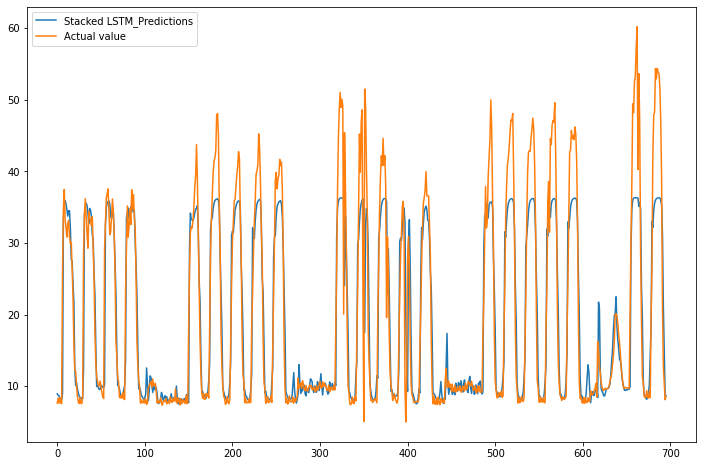

In [20]:
#pred=model.predict(X_test)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(test_prediction,label='Stacked LSTM_Predictions')
plt.plot(y_test,label='Actual value')
plt.legend(loc="upper left")
plt.show()

In [21]:
y_test=y_test.reshape(-1,1)

y_test[0],test_prediction[0]

(array([7.63]), array([8.934576], dtype=float32))

In [22]:
d1=[]
for i in range(len(y_test)):
    d1.append(y_test[i]-test_prediction[i])
    
print(d1)

[array([-1.30457603]), array([-0.38551132]), array([-1.02369034]), array([0.14556183]), array([-0.63786518]), array([-0.53263802]), array([17.06677494]), array([1.43794556]), array([1.77487823]), array([-2.81272186]), array([-3.30293335]), array([-3.81465118]), array([-0.96819946]), array([-1.39980804]), array([-3.62338104]), array([-2.04670464]), array([2.4609507]), array([-1.05253845]), array([-1.97458717]), array([-5.81668983]), array([-0.37411171]), array([2.04331123]), array([-0.43037865]), array([-1.05791969]), array([-1.19550076]), array([-1.08507221]), array([0.11774559]), array([-0.82358376]), array([-0.67212601]), array([0.17713993]), array([15.65889832]), array([0.10759155]), array([0.98960846]), array([-1.9005426]), array([-3.89623871]), array([-4.89607666]), array([1.68372955]), array([-1.36682037]), array([-1.23925537]), array([-1.30640869]), array([2.55340164]), array([-1.5363485]), array([-0.79129005]), array([-5.36394051]), array([-2.34122269]), array([1.32565525]), ar

In [23]:
d1.sort()
# Range of error value
max(d1),min(d1)

(array([34.02399994]), array([-25.80776138]))

In [24]:
neg=[]
pos=[]
for i in range(len(d1)):
  if(d1[i]<0):
    neg.append(d1[i])
  if(d1[i]>0):  
    pos.append(d1[i])

In [25]:
len(neg),len(pos)

(362, 334)